### Code to plot a telemetry profile (Beta!)
#### 2021 0128 CJH
---
* Imports a file with helper function definitions `import telemetry_plot_utils as tpu ` 
* Reads data from the robot/sim/data folder with `telemetry = tpu.load_file(file)`
* Converts that data to a useful pandas dataframe with `df = tpu.fix_data(telemetry)`
  * `df, telemetry = tpu.get_data(file_name='20210130_151440', x_offset=0, y_offset=0.0)` combines the load and table functions
* Gets a list of the pathweaver points with `df_points = tpu.get_points_df(name='bounce')`
* Plots them all together with plot_df, e.g. `tpu.plot_df(df_slalom_weave, telemetry_slalom_weave, point_df=df_slalom_points, background='slalom', arrows=True, save=False)`
* Plots the velocity profiles with e.g. `tpu.velocity_plot(df_slalom_weave)`

In [2]:
from networktables import NetworkTables
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pickle
import glob
from importlib import reload

In [4]:
import telemetry_plot_utils as tpu 

#### load data from pickle files in the /robot/sim/data folder

In [5]:
pwd

'C:\\Cory\\CJH Shared\\Python\\FRC\\2021\\notebooks'

In [87]:
# get a list of all the files 
data_files = glob.glob('../robot/sim/data/*.pkl')
data_files[-5:]

['../robot/sim/data\\20210130_152021_slalom_pw2_1.25_kpvel_0p7vel_1.25.pkl',
 '../robot/sim/data\\20210130_193948_slalom_pw1_1.25_kpvel_0p7vel_1.25.pkl',
 '../robot/sim/data\\20210130_194501_slalom_pw1_1.25_kpvel_0p7vel_1.25.pkl',
 '../robot/sim/data\\20210130_194741_slalom_pw1_1.25_kpvel_0p7vel_1.25.pkl',
 '../robot/sim/data\\20210130_195204_slalom_pw1_1.25_kpvel_0p7vel_1.25.pkl']

In [7]:
infile = data_files[-1]
telemetry = tpu.load_file(infile)

#### convert data to table, add vector data and correct for field starting point offsets

In [8]:
df = tpu.fix_data(telemetry, x_offset=1.2, y_offset=0.9) # starting offsets for 

#### take a quick look at the pandas datatable from the odometry

In [9]:
# want to do typical python slicing but that does not work with pandas so use a little logic to cut down the table for displaying here
df[(df.index) % 50 == 0].round(2)

TIME  RBT_X  RBT_Y  RBT_TH  RBT_VEL  RBT_RVEL  RBT_LVEL  TRAJ_X  TRAJ_Y  \
0     0.08   2.50   1.56    0.00     0.00      0.00      0.00    2.30    1.55   
50    5.08   3.48   3.62    0.53     0.52      1.07     -0.04    3.48    3.39   
100  10.08   8.20   3.39   -1.60    -0.14      0.24     -0.51    7.73    3.28   
150  15.08   9.52   1.66    0.12     0.89      0.70      1.07    9.43    1.59   
200  20.08   8.27   3.31   -2.75     0.72      0.60      0.84    8.18    3.41   
250  25.08   7.05   1.64    3.07     1.53      1.36      1.70    6.61    1.55   
300  30.08   3.56   2.26    1.34     1.32      1.17      1.46    3.59    2.80   

     TRAJ_TH  ...  RAM_LVEL_SP  RAM_RVEL_SP  RAM_OM   LFF   RFF  LPID  RPID  \
0      -0.00  ...         0.05         0.05   -0.00  1.25  1.24  0.04  0.03   
50      0.00  ...         0.16         0.02   -0.20  1.48  1.18  0.14 -0.74   
100    -1.57  ...         0.57         0.40   -0.26  2.38  1.99  0.76  0.11   
150     0.69  ...        -2.51         1.72    6.13 -6.54  4.84 -2.51  0.71   
200    -2.48  ...        -1.29         1.92    4.65 -3.91  5.27 -1.49  0.92   
250     3.13  ...         2.15         2.48    0.48  5.76  6.48  0.31  0.79   
300     1.59  ...         1.10         1.40    0.43  3.51  4.16 -0.25  0.16   

     DELTA  VEC_X  VEC_Y  
0     0.00   0.00   0.00  
50    0.05   0.05   0.03  
100   0.02  -0.00  -0.02  
150   0.09   0.09   0.01  
200   0.07  -0.07  -0.03  
250   0.15  -0.15   0.01  
300   0.13   0.03   0.13  

[7 rows x 22 columns]

### loading point lists from pathweaver files
* just pass the function the unique part of the name of the file you want the points for and this gets plotted on the summary

In [86]:
path_weaver_files = data_files = glob.glob('../robot/pathweaver/paths/*')
path_weaver_files

['../robot/pathweaver/paths\\barrel_pw1.path',
 '../robot/pathweaver/paths\\bounce_pw1.path',
 '../robot/pathweaver/paths\\calibrate.path',
 '../robot/pathweaver/paths\\drive_up.path',
 '../robot/pathweaver/paths\\slalom_pw0',
 '../robot/pathweaver/paths\\slalom_pw1',
 '../robot/pathweaver/paths\\slalom_pw2']

In [83]:
df_points = tpu.get_points_df(name='bounce')
df_points.head()

X         Y  Tangent X  Tangent Y  Fixed Theta  Reversed  Name
0  1.270459  2.371777   0.901575   0.126982         True     False   NaN
1  2.121240  2.905103   0.244387   0.450954        False     False   NaN
2  2.248223  3.540015   0.190474   1.447599         True     False   NaN
3  2.375205  3.273352   0.139681  -0.584119         True     False   NaN
4  2.959324  1.597185   0.304758  -0.380947         True     False   NaN

In [85]:
# get the points used to generate the trajectory
df_points = tpu.get_points_df(name='slalom_pw1')
df_points.head()

X         Y  Tangent X  Tangent Y  Fixed Theta  Reversed  Name
0  1.100000  0.686751   0.520091   0.006372         True     False   NaN
1  2.098016  0.928900   0.210287   0.312245         True     False   NaN
2  2.646037  1.833772   0.385870   0.478197        False     False   NaN
3  3.206803  2.400910   0.312245   0.223032         True     False   NaN
4  3.773941  2.732271   0.560766   0.159308         True     False   NaN

---
### 0.75 m/s on pathweaver slalom- 32 second trajectory.  1.25 on pathweaver slalom = 21s trajectory

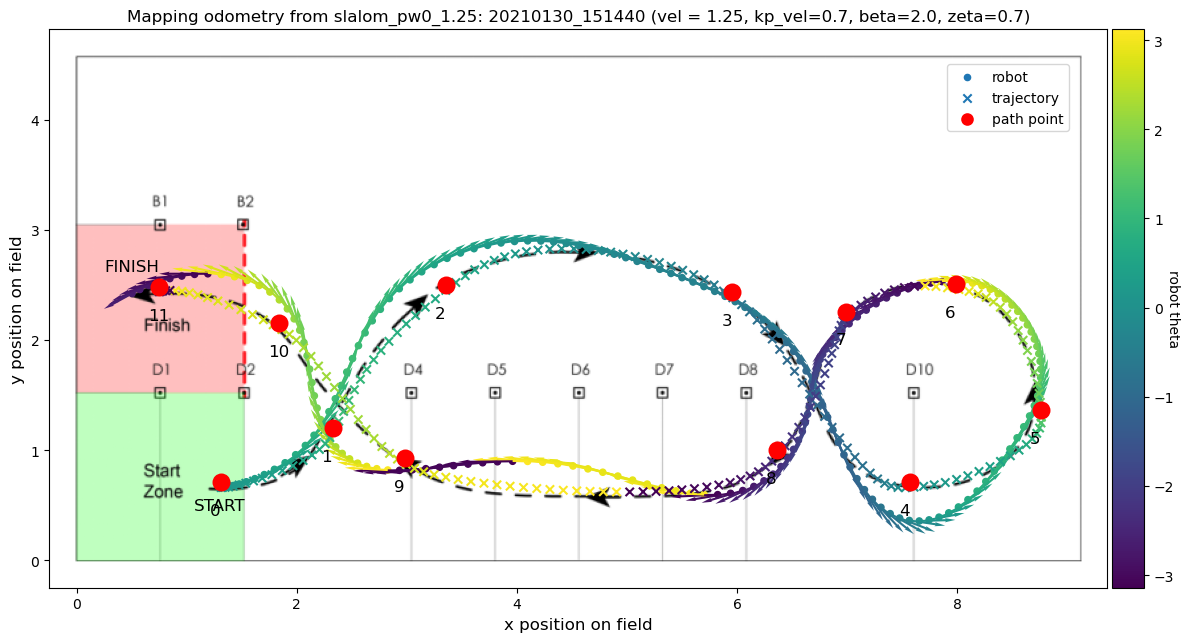

In [80]:
# initial guess on slalom_pw0 - putting all points on the path
reload(tpu)
df_slalom_points = tpu.get_points_df(name='slalom_pw0')
df_slalom_weave, telemetry_slalom_weave = tpu.get_data(file_name='20210130_151440', x_offset=0, y_offset=0.0)
tpu.plot_df(df_slalom_weave, telemetry_slalom_weave, point_df=df_slalom_points, background='slalom', arrows=True, save=False)
#tpu.velocity_plot(df_slalom_weave)

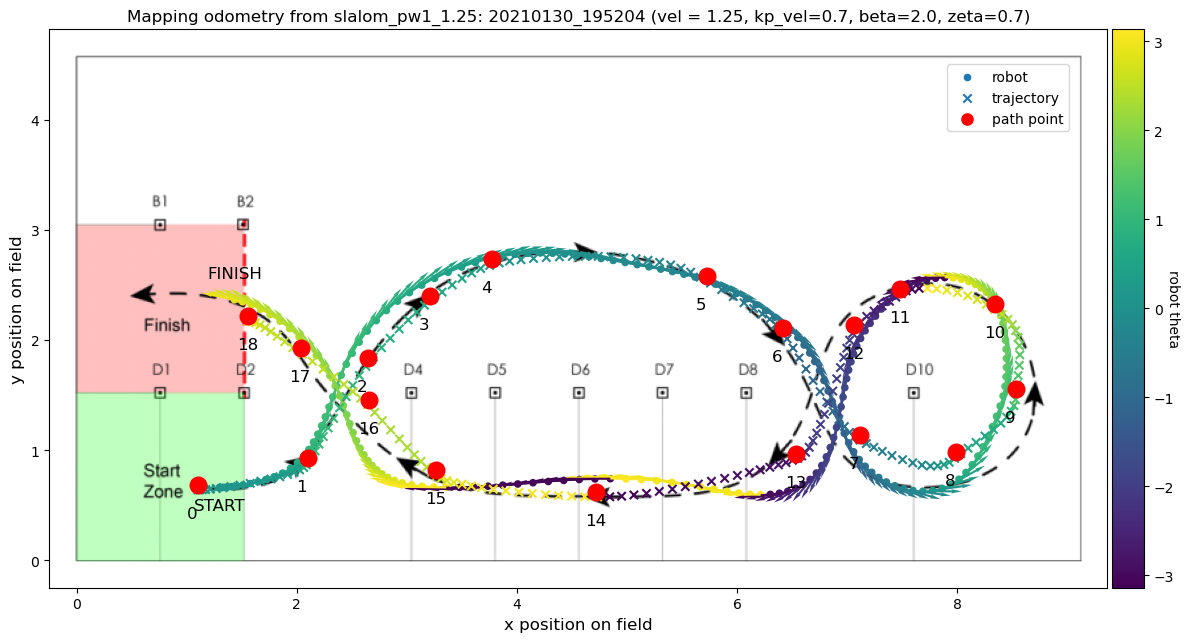

In [93]:
# revised slalom_pw1 - moving the points in to compensate for tendency to overshoot
reload(tpu)
df_slalom_points = tpu.get_points_df(name='slalom_pw1')
df_slalom_weave, telemetry_slalom_weave = tpu.get_data(file_name='20210130_195204', x_offset=0, y_offset=0.0)
tpu.plot_df(df_slalom_weave, telemetry_slalom_weave, point_df=df_slalom_points, background='slalom', arrows=True, save=False)
#tpu.velocity_plot(df_slalom_weave)

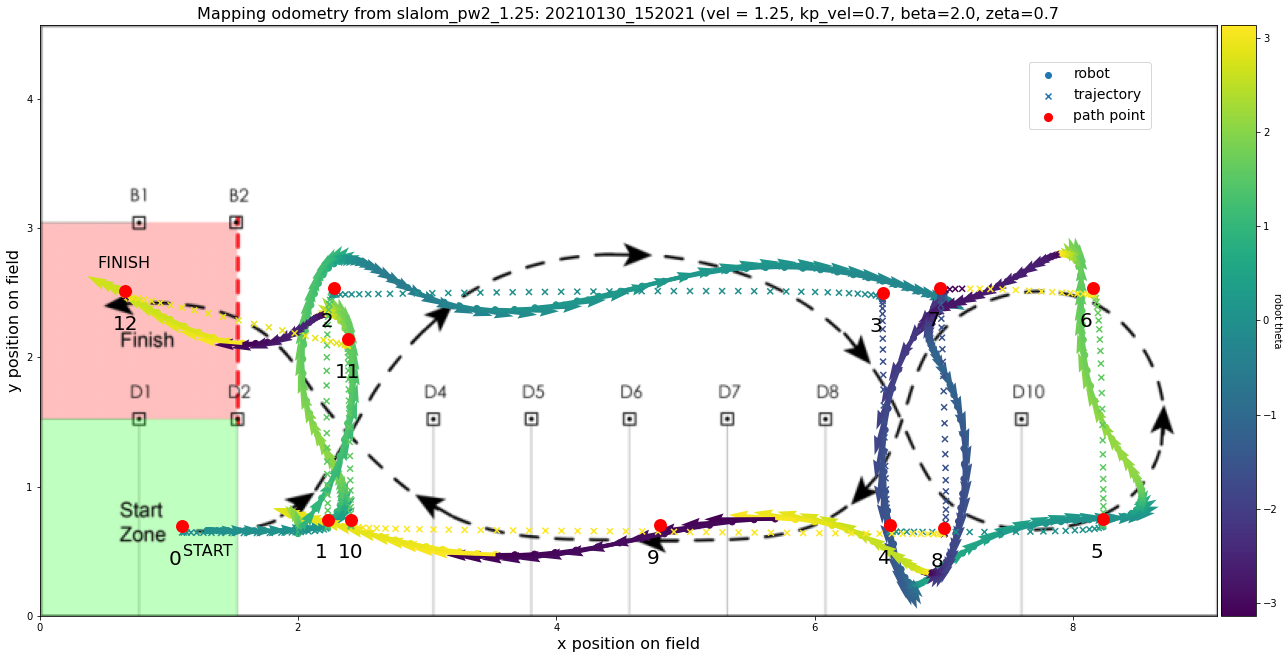

In [13]:
# messing aroud with a square path on slalom_pw2
reload(tpu)
df_slalom_points = tpu.get_points_df(name='slalom_pw2')
df_slalom_weave, telemetry_slalom_weave = tpu.get_data(file_name='20210130_152021', x_offset=0, y_offset=0.0)
tpu.plot_df(df_slalom_weave, telemetry_slalom_weave, point_df=df_slalom_points, background='slalom_crop', arrows=True, save=False)
#tpu.velocity_plot(df_slalom_weave)

#### previous data on tuning the gains (probably broken now since the points have changed)

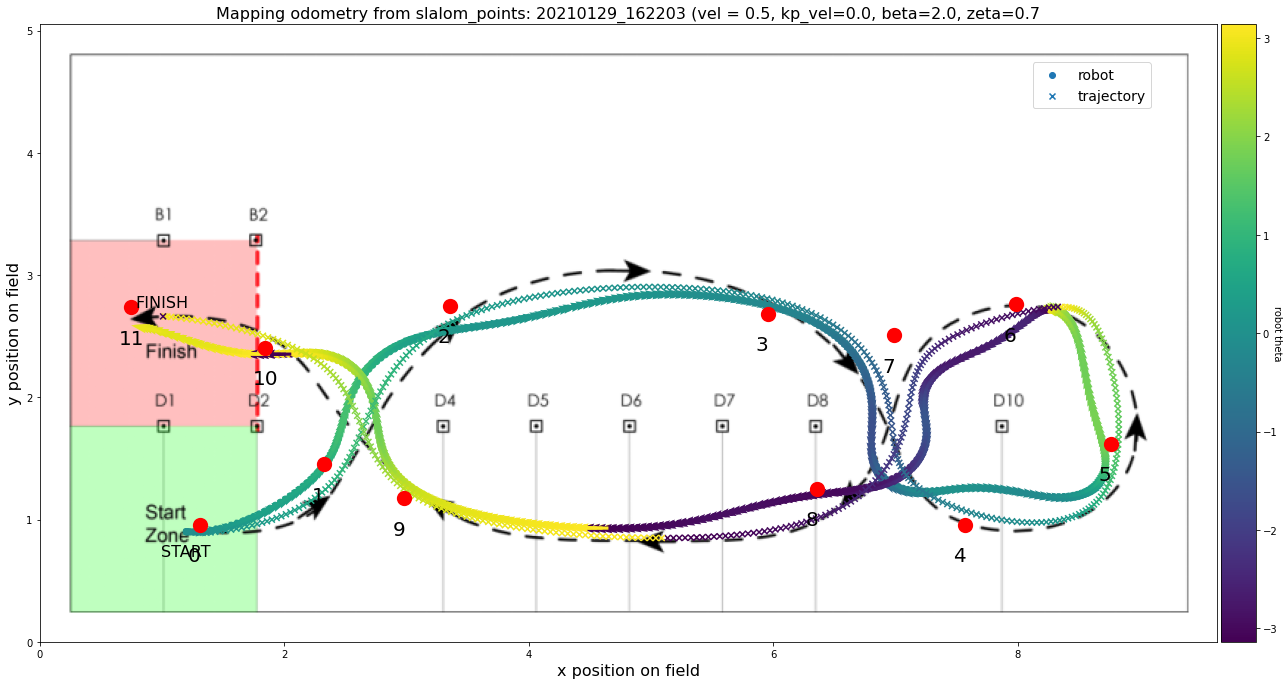

In [459]:
reload(tpu)
df_slalom_pts, telemetry_slalom_pts = tpu.get_data(file_name='20210129_162203', x_offset=1.2, y_offset=0.9)
tpu.plot_df(df_slalom_pts, telemetry_slalom_pts, point_df=df_points, arrows=True, save=False)

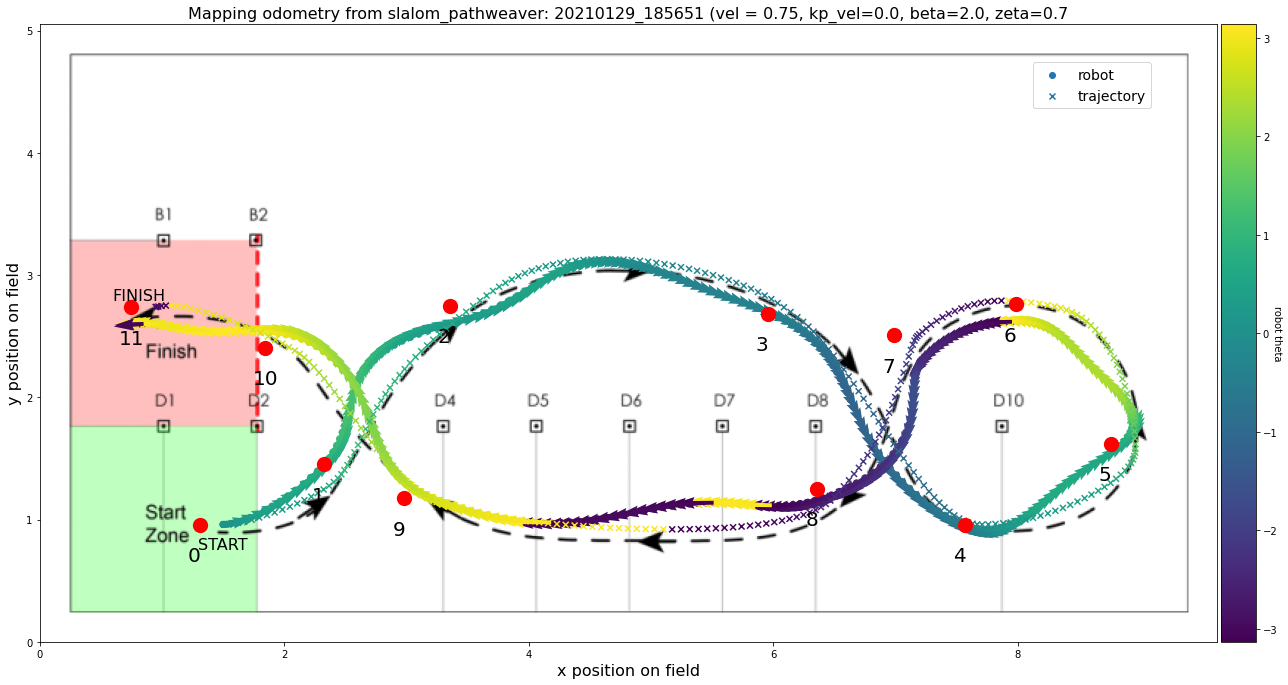

In [460]:
reload(tpu)
df_slalom_points = tpu.get_points_df(name='slalom')
df_slalom_weave, telemetry_slalom_weave = tpu.get_data(file_name='20210129_185651', x_offset=0.2, y_offset=0.3)
tpu.plot_df(df_slalom_weave, telemetry_slalom_weave, point_df=df_slalom_points, arrows=True, save=False)

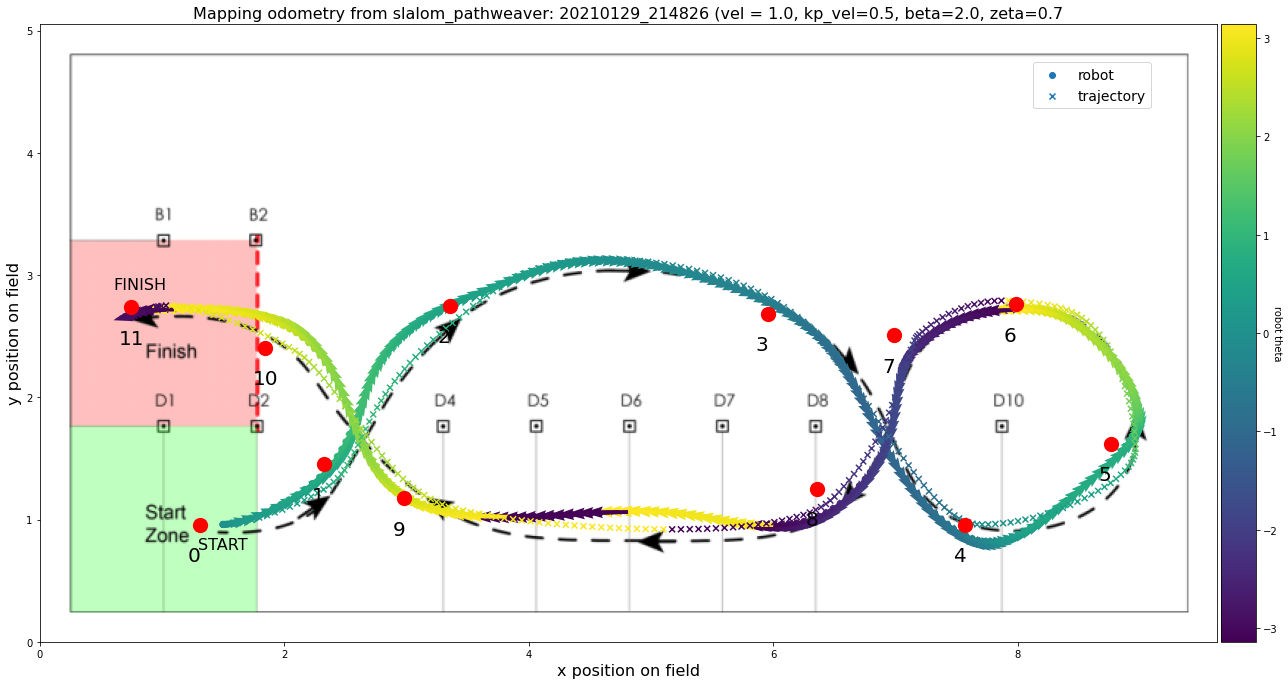

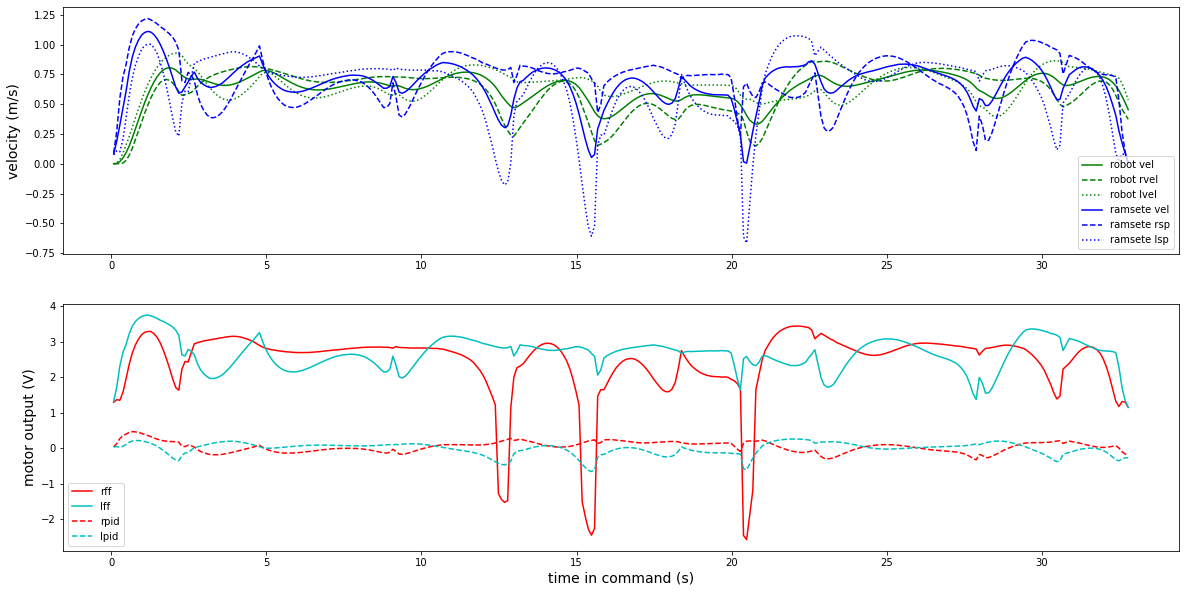

In [475]:
reload(tpu)
df_slalom_points = tpu.get_points_df(name='slalom')
df_slalom_weave2, telemetry_slalom_weave2 = tpu.get_data(file_name='20210129_214826', x_offset=0.2, y_offset=0.3)
tpu.plot_df(df_slalom_weave2, telemetry_slalom_weave2, point_df=df_slalom_points, arrows=True, save=False)
tpu.velocity_plot(df_slalom_weave2)

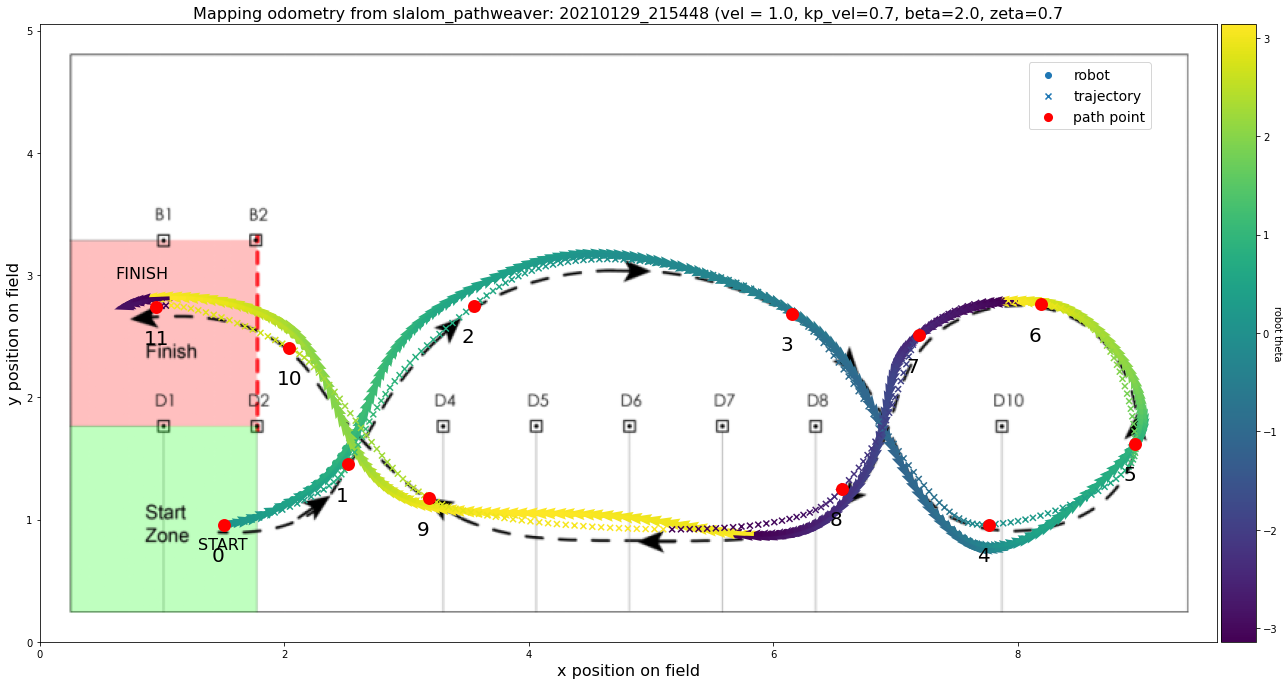

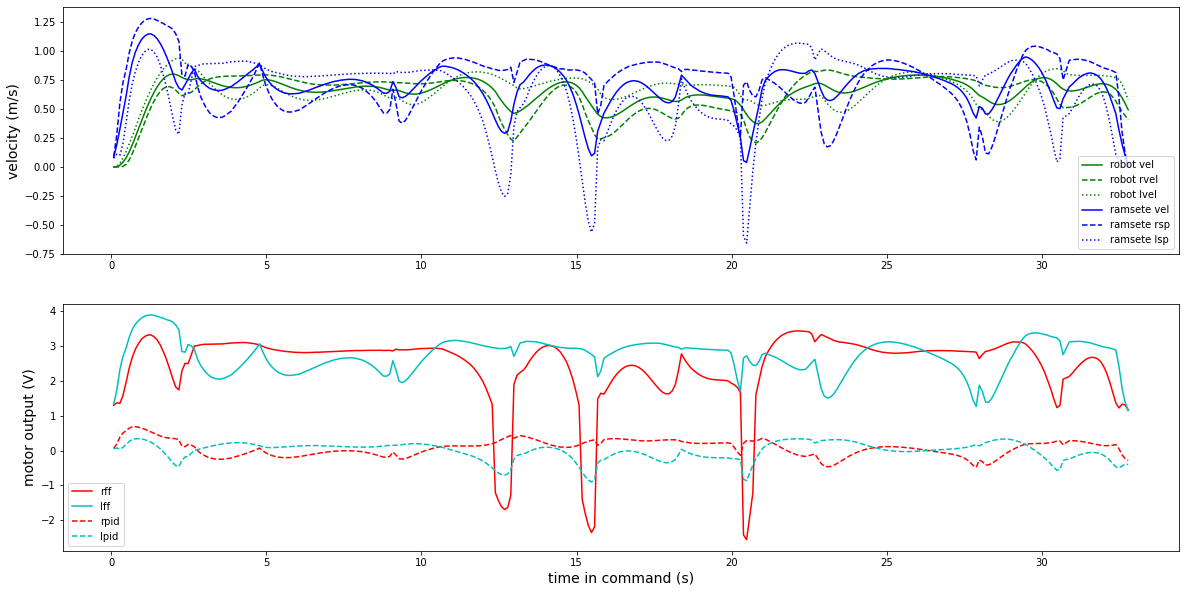

In [491]:
reload(tpu)
df_slalom_points = tpu.get_points_df(name='slalom', x_shift=0.2)
df_slalom_weave3, telemetry_slalom_weave3 = tpu.get_data(file_name='20210129_215448', x_offset=0.2, y_offset=0.3)
tpu.plot_df(df_slalom_weave3, telemetry_slalom_weave3, point_df=df_slalom_points, arrows=True, save=False)
tpu.velocity_plot(df_slalom_weave3)

#### reversing the sign of the velocity PID controller - making sure that I have it right, and this makes it far worse - PID fights Ramsete

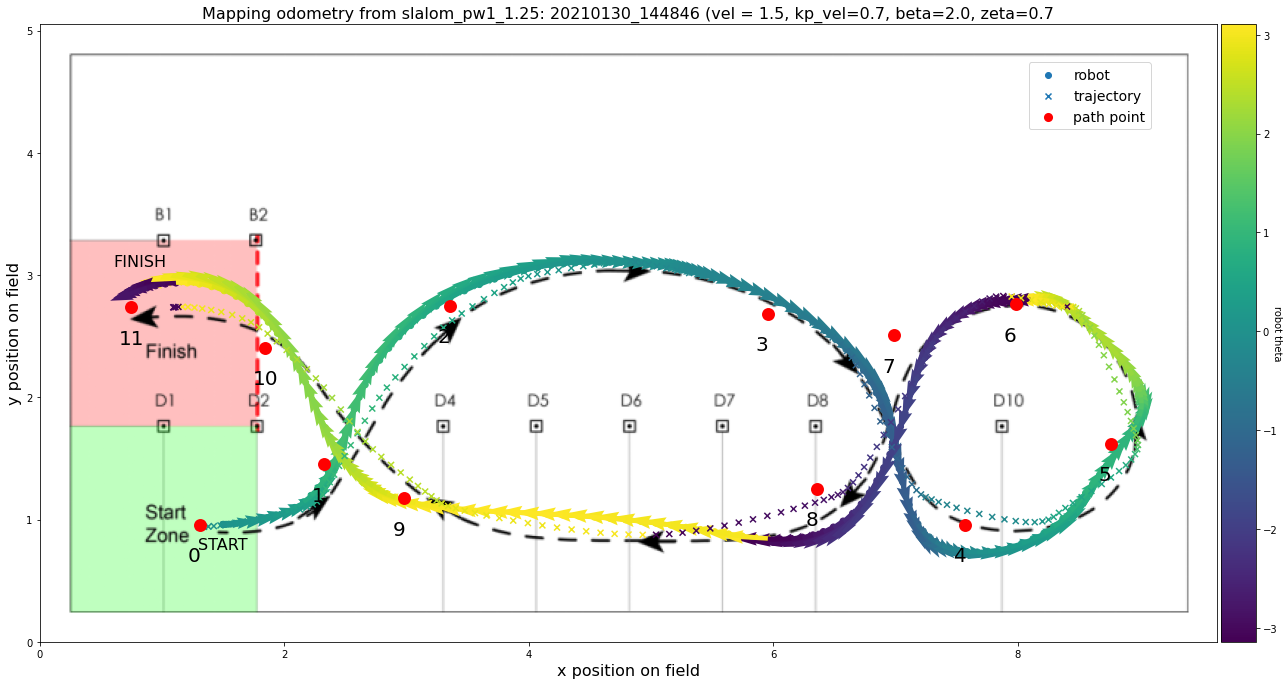

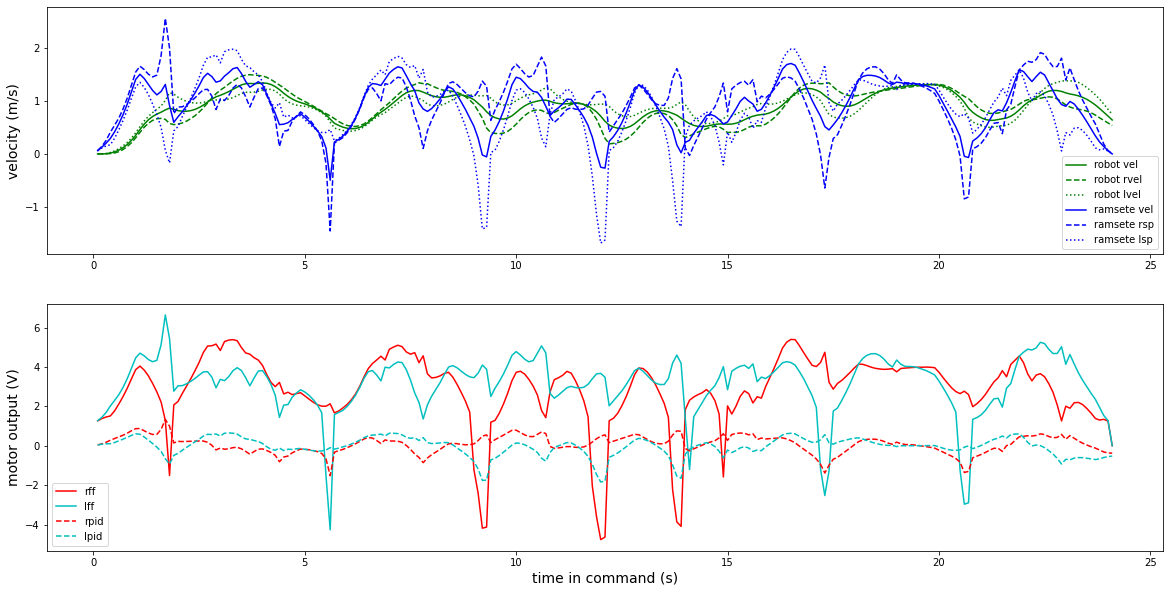

In [498]:
reload(tpu)
df_slalom_points = tpu.get_points_df(name='slalom')
df_slalom_weave4, telemetry_slalom_weave4 = tpu.get_data(file_name=None, x_offset=0.2, y_offset=0.3)
tpu.plot_df(df_slalom_weave4, telemetry_slalom_weave4, point_df=df_slalom_points, arrows=True, save=False)
tpu.velocity_plot(df_slalom_weave4)

#### weird - making kp_vel 1.1 (higher value) now makes it a wider circle.  Doesn't track as well.  
* 0.5 to 0.7 seems the best for it with the default values for the Ramsete

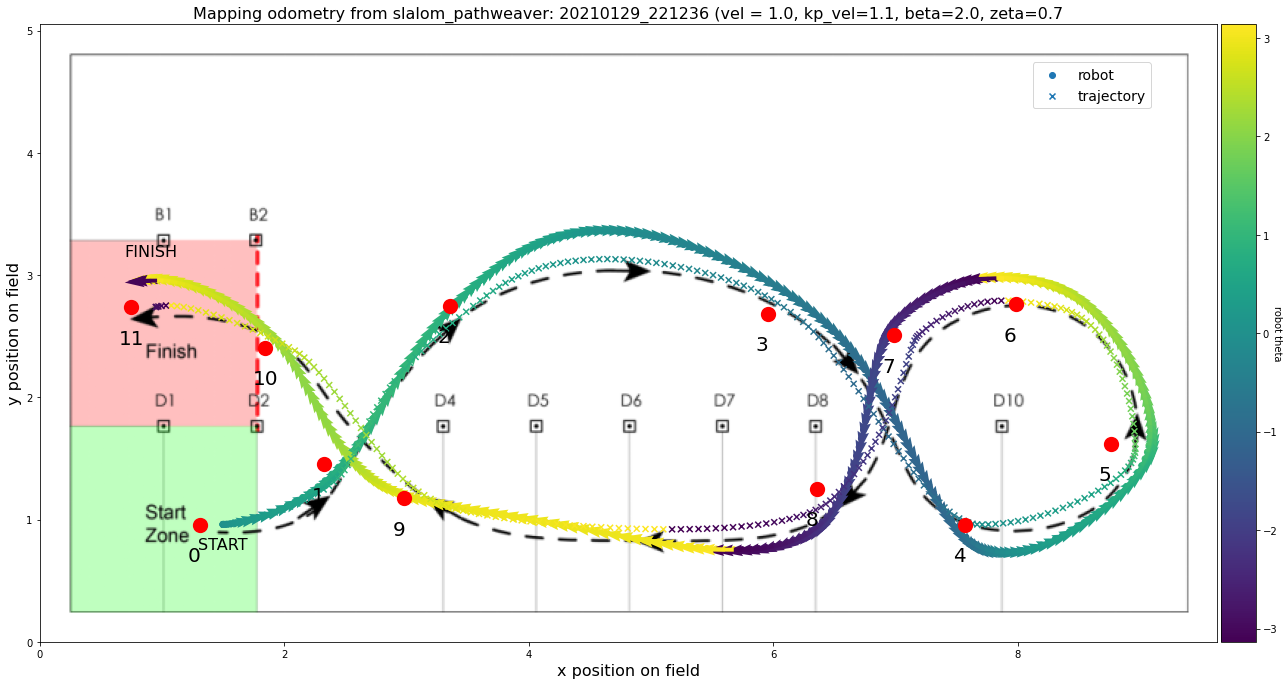

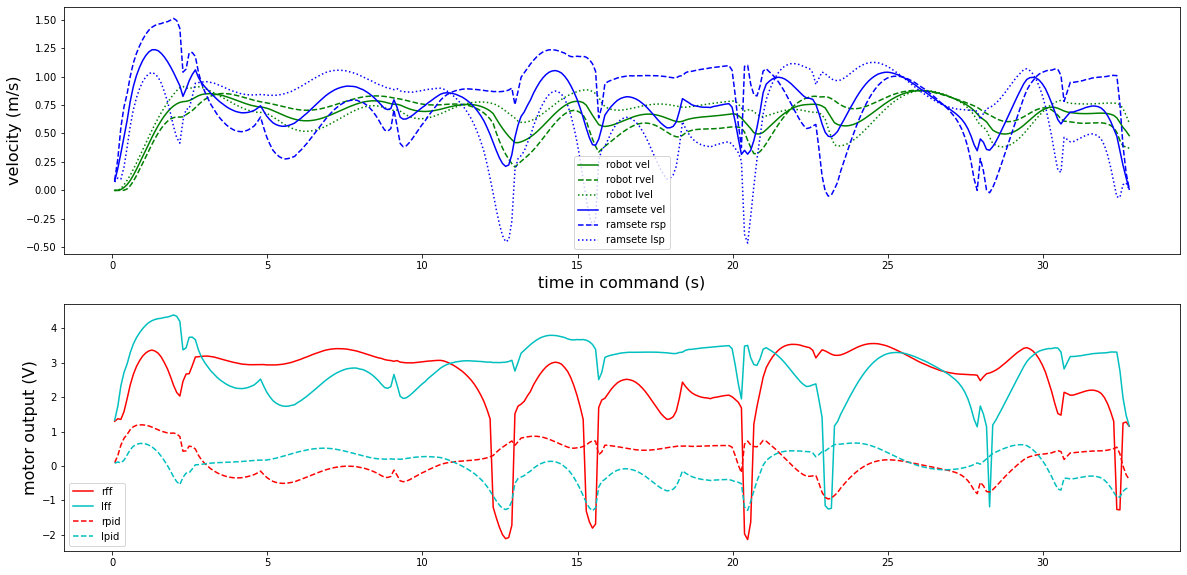

In [456]:
reload(tpu)
df_slalom_weave5, telemetry_slalom_weave5 = tpu.get_data(file_name='20210129_221236', x_offset=0.2, y_offset=0.3)
tpu.plot_df(df_slalom_weave5, telemetry_slalom_weave5, point_df=df_slalom_points, arrows=True, save=False)
tpu.velocity_plot(df_slalom_weave5)

### speeding it up to 1.25 m/s on the pathweaver trajectory - 21s  (may need a path where we pull in the circle a bit)

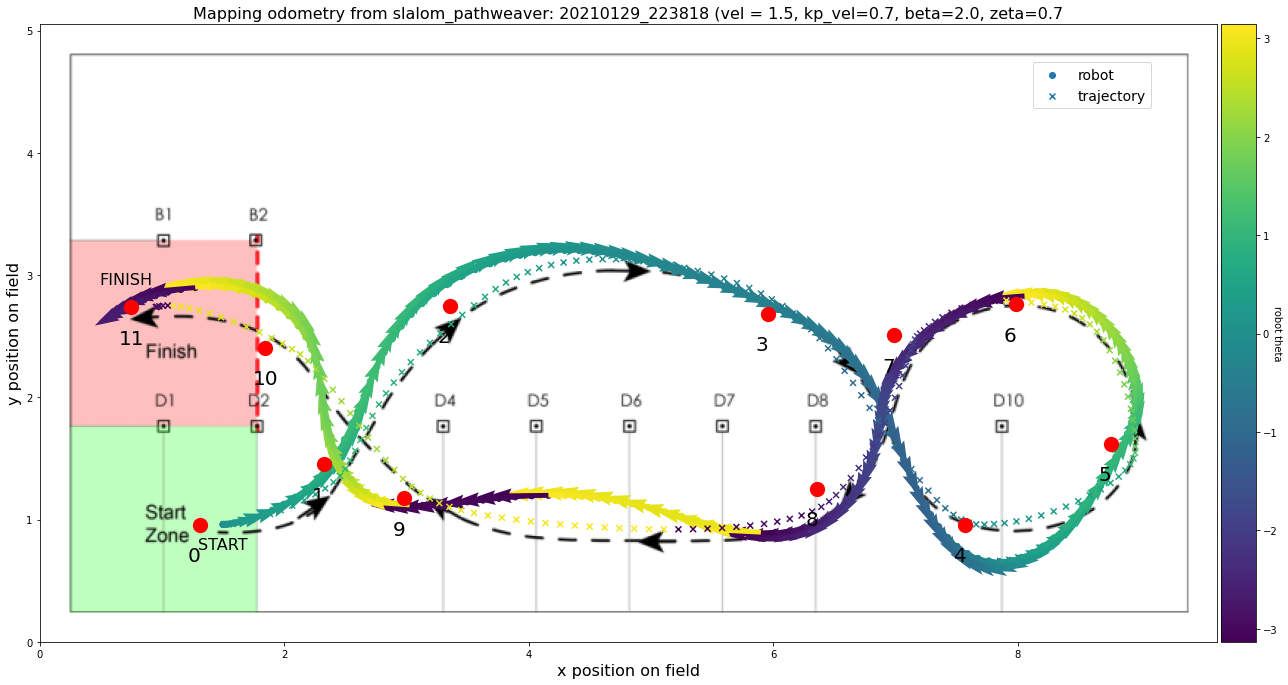

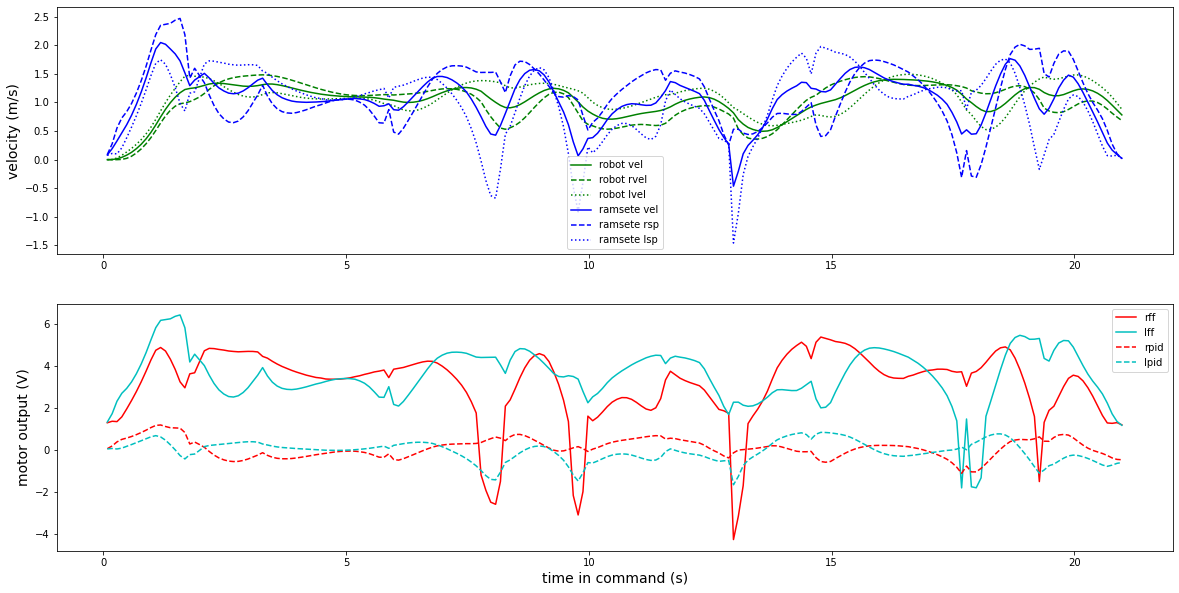

In [465]:
df_slalom_weave6, telemetry_slalom_weave6 = tpu.get_data(file_name='20210129_223818', x_offset=0.2, y_offset=0.3)
tpu.plot_df(df_slalom_weave6, telemetry_slalom_weave6, point_df=df_slalom_points, arrows=True, save=False)
tpu.velocity_plot(df_slalom_weave6)

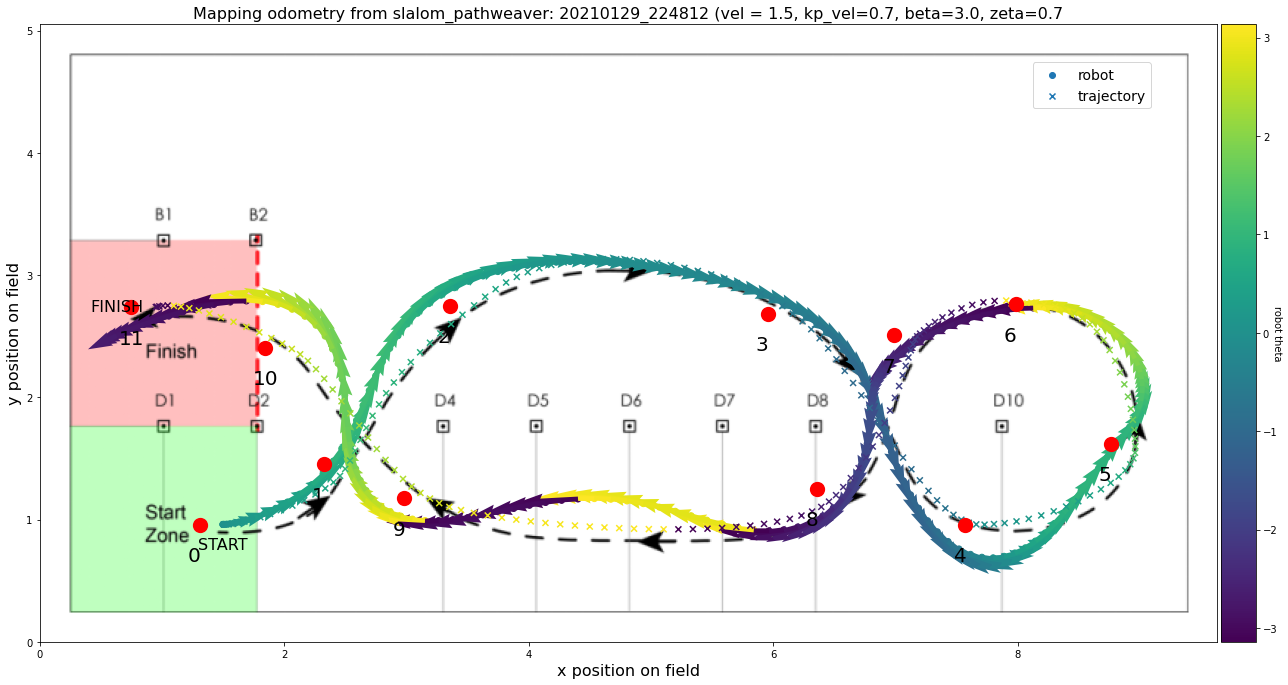

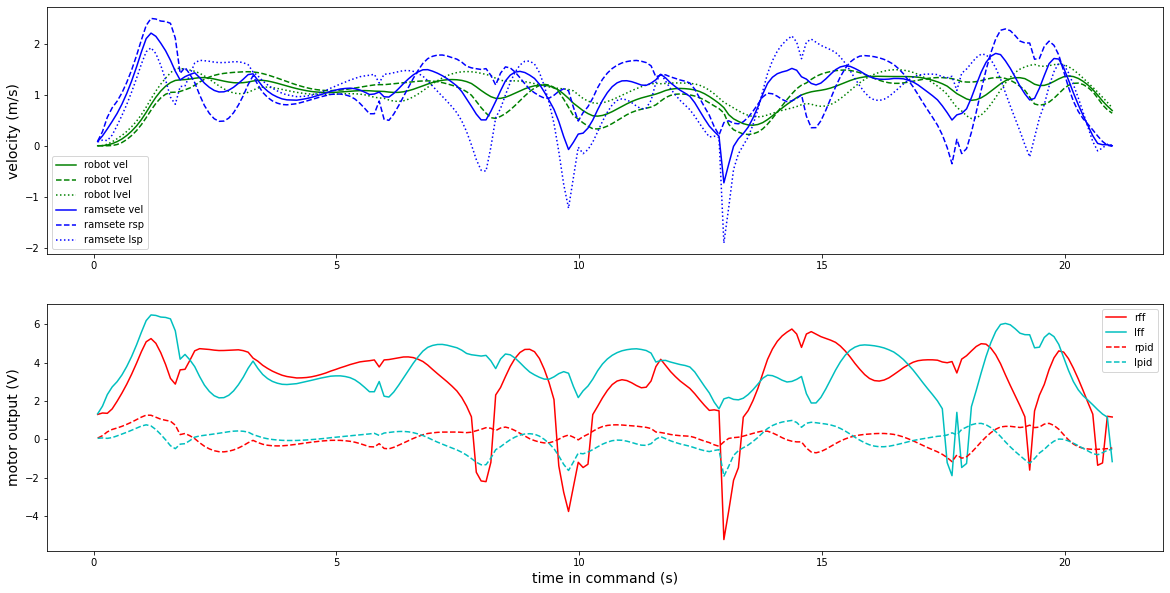

In [469]:
df_slalom_weave7, telemetry_slalom_weave7 = tpu.get_data(file_name='20210129_224812', x_offset=0.2, y_offset=0.3)
tpu.plot_df(df_slalom_weave7, telemetry_slalom_weave7, point_df=df_slalom_points, arrows=True, save=False)
tpu.velocity_plot(df_slalom_weave7)

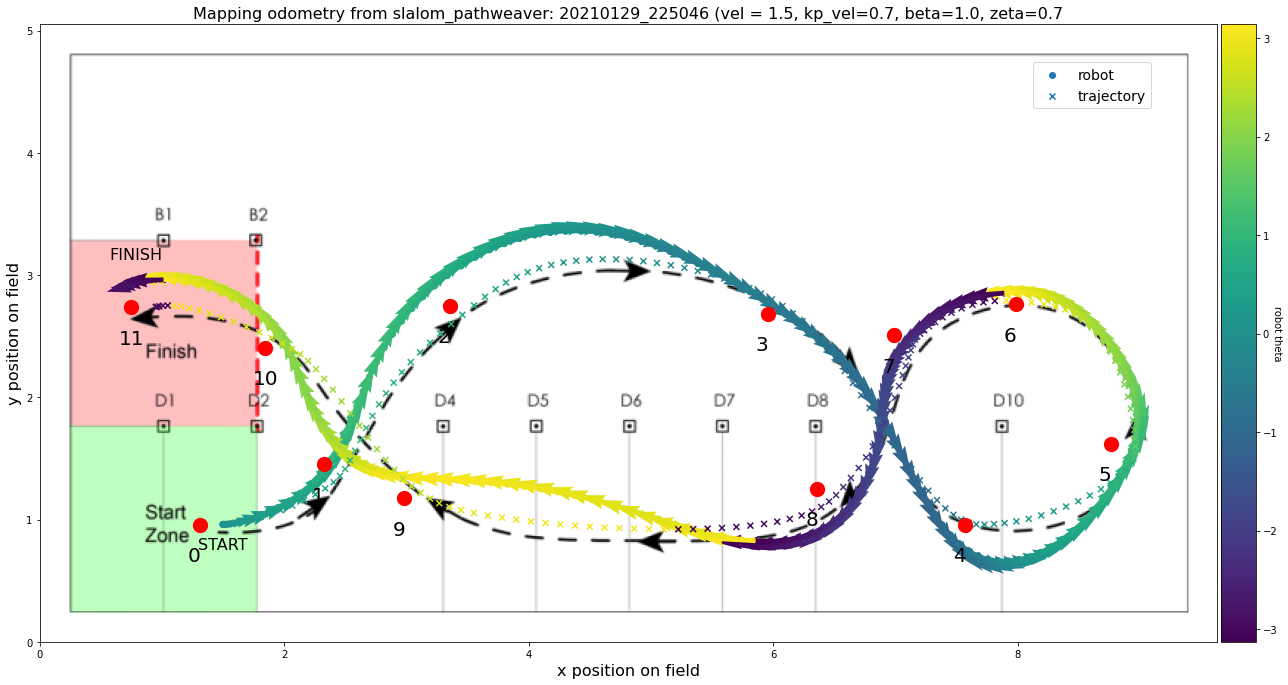

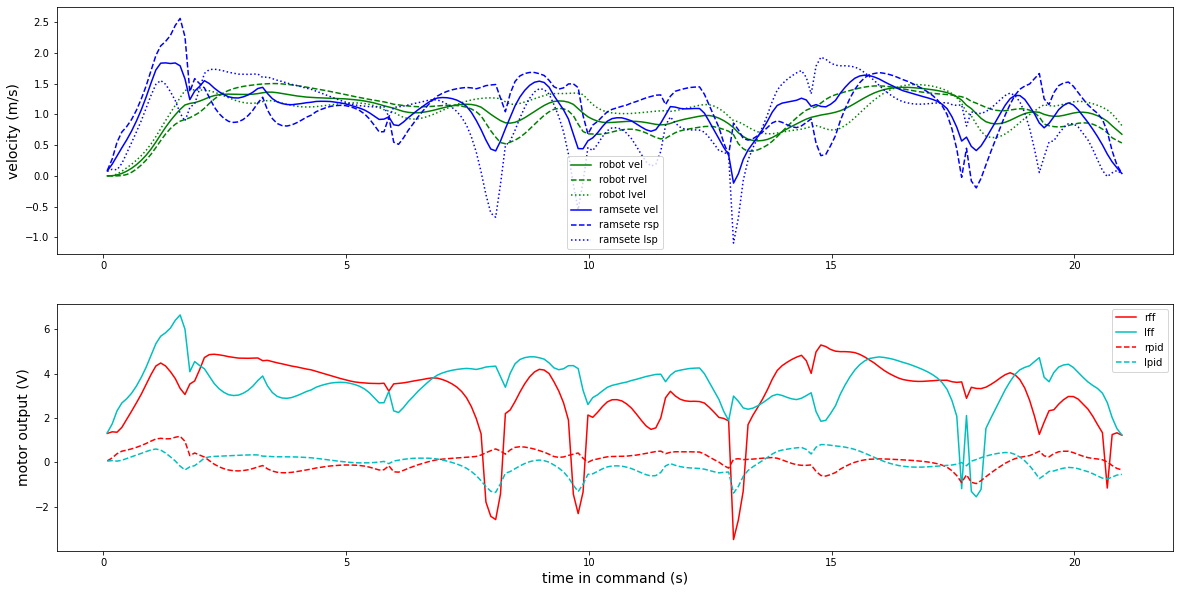

In [470]:
df_slalom_weave8, telemetry_slalom_weave8 = tpu.get_data(file_name='20210129_225046', x_offset=0.2, y_offset=0.3)
tpu.plot_df(df_slalom_weave8, telemetry_slalom_weave8, point_df=df_slalom_points, arrows=True, save=False)
tpu.velocity_plot(df_slalom_weave8)

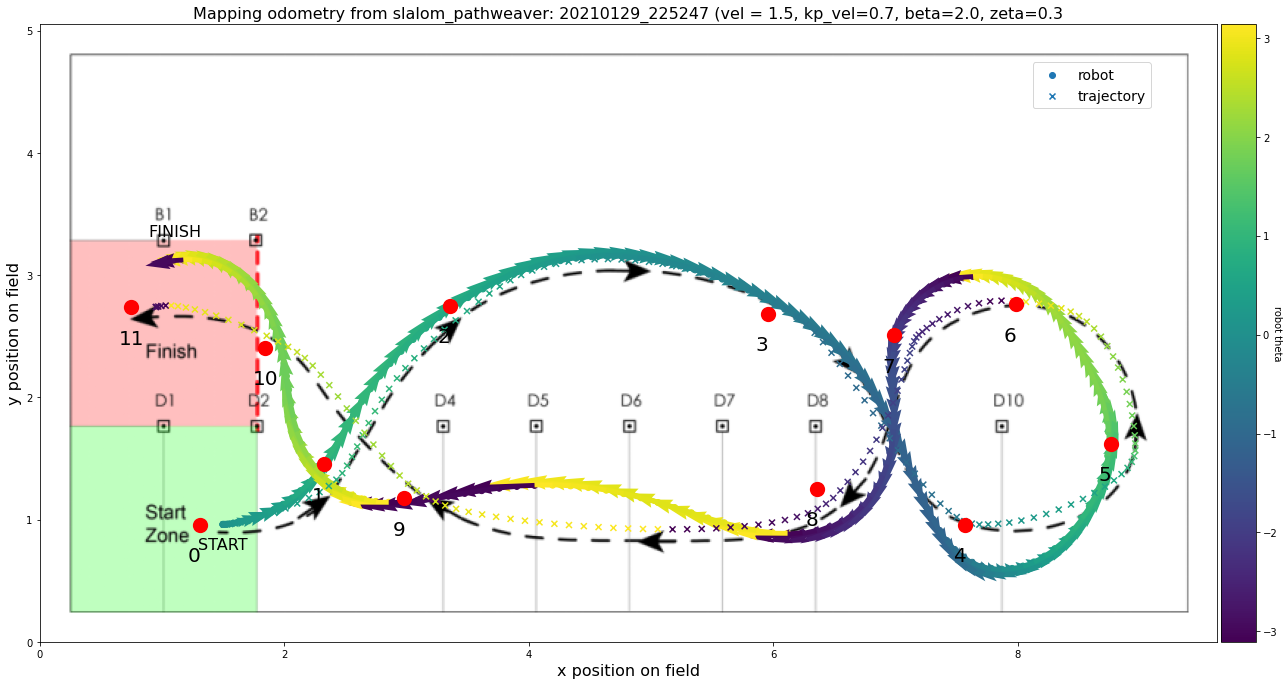

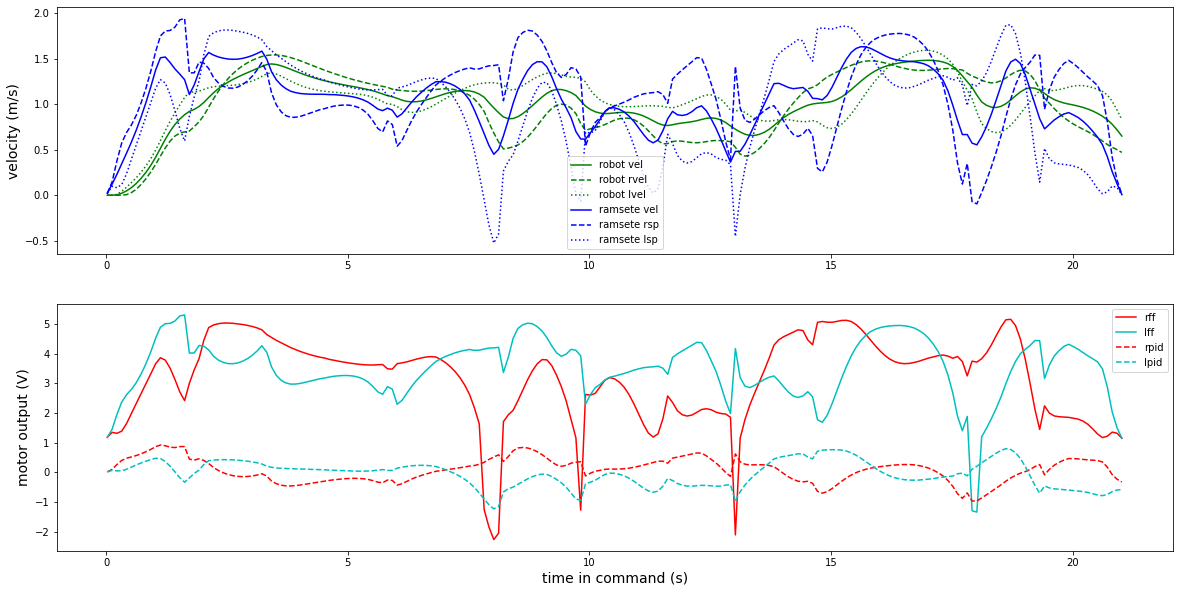

In [471]:
df_slalom_weave9, telemetry_slalom_weave9 = tpu.get_data(file_name='20210129_225247', x_offset=0.2, y_offset=0.3)
tpu.plot_df(df_slalom_weave9, telemetry_slalom_weave9, point_df=df_slalom_points, arrows=True, save=False)
tpu.velocity_plot(df_slalom_weave9)